### Data Collection

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
df.shape

(12294, 7)

In [3]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
print(df['genre'].mode())
print(df['type'].mode())

0    Hentai
Name: genre, dtype: object
0    TV
Name: type, dtype: object


In [5]:
# Imputing the null values
df['genre'].fillna('Hentai', inplace = True)
df['type'].fillna('TV', inplace = True)
df['rating'].fillna(df['rating'].median(), inplace = True)

C:\Users\cs833\AppData\Local\Temp\ipykernel_3300\1436326625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('Hentai', inplace = True)
C:\Users\cs833\AppData\Local\Temp\ipykernel_3300\1436326625.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [6]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
df.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [9]:
df[['anime_id', 'rating', 'members']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12294.0,6.475700,1.017179,1.67,5.90,6.57,7.17,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [10]:
df['anime_id'].value_counts()

anime_id
32281    1
30404    1
26013    1
26017    1
15787    1
        ..
12455    1
28789    1
373      1
2089     1
26081    1
Name: count, Length: 12294, dtype: int64

In [11]:
df['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

### Exploratory Data Analysis

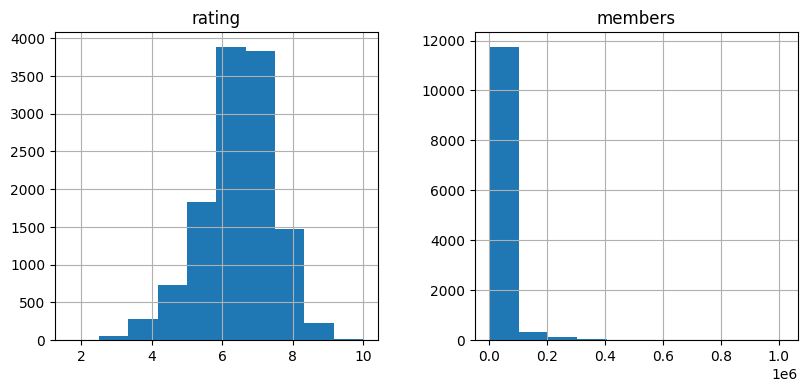

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_hist = df[['rating', 'members']]
df_hist.hist(figsize=(15, 4), layout=(1, 3))
plt.show()

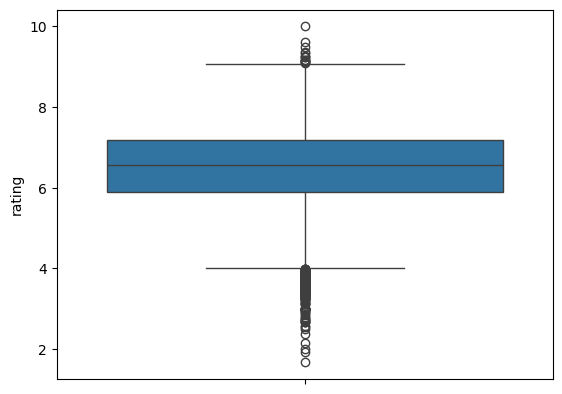

In [13]:
sns.boxplot(df['rating'])
plt.show()

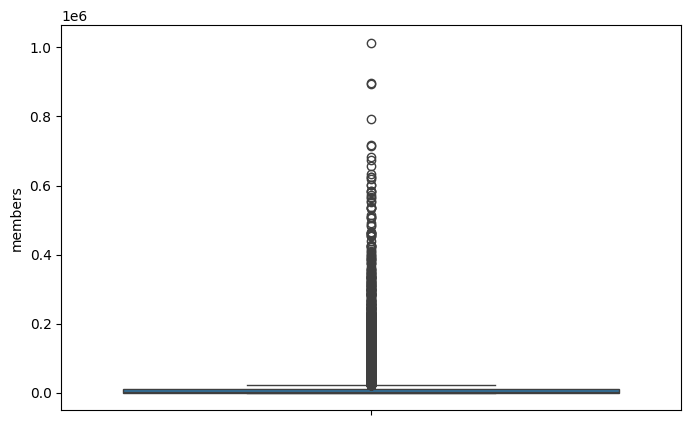

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['members'])
plt.show()

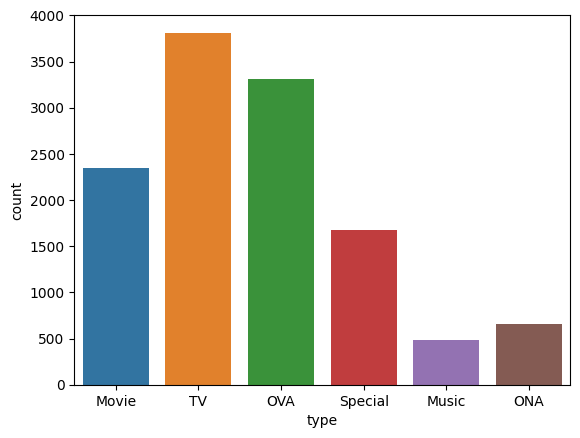

In [15]:
sns.countplot(data=df, x='type', hue = 'type')
plt.show()

Here, most of the anime's are watched on TV.

### Data Transformation

In [16]:
genre_to_id={genre: i for i, genre in enumerate(df['genre'].unique())}
df['genre_id']=df['genre'].map(genre_to_id)

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df['rating'] = ss.fit_transform(df[['rating']])
df['members'] = ss.fit_transform(df[['members']])


#### Pivot table

In [18]:
anime_df = pd.pivot_table(data=df, index = 'anime_id', columns='genre', values='rating')
anime_df.fillna(0, inplace=True)

In [19]:
anime_df

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.metrics import pairwise_distances
anime_pd = 1 - pairwise_distances(anime_df.values,metric='cosine')

In [21]:
np.fill_diagonal(anime_pd, 0)

In [22]:
anime_new_df = pd.DataFrame(anime_pd)
anime_new_df

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Set the index and columns to anime_id
anime_new_df.index = df['anime_id'].unique()
anime_new_df.columns = df['anime_id'].unique()

In [24]:
anime_new_df.max()

32281    1.0
5114     0.0
28977    1.0
9253     0.0
9969     1.0
        ... 
9316     0.0
5543     1.0
5621     1.0
6133     0.0
26081    1.0
Length: 12294, dtype: float64

In [25]:
anime_new_df.idxmax(axis=1)[:10]

32281     8800
5114     32281
28977      868
9253     32281
9969     12413
32935    30296
11061    32281
820      32281
15335      264
15417    32281
dtype: int64

In [26]:
df[(df['anime_id']==820) | (df['anime_id']==32281)]

,anime_id,name,genre,type,episodes,rating,members,genre_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,2.845534,3.330241,0
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,2.589915,1.142091,6


These anime's have similar type of genres, then who like 'Drama' type of genre anime can be recommended to the user who eatch 'Drama' genre.

In [27]:
df[(df['anime_id']==5114) | (df['anime_id']==32281)]

,anime_id,name,genre,type,episodes,rating,members,genre_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,2.845534,3.330241,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,2.737388,14.148406,1


In [28]:
df[(df['anime_id']==15417) | (df['anime_id']==32281)]

,anime_id,name,genre,type,episodes,rating,members,genre_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,2.845534,3.330241,0
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,2.589915,1.149935,2


In [29]:
# Define a function to recommend anime based on cosine similarity

def recommend_anime(target_anime_id,threshold=0.5):

    similar_anime_ids=anime_new_df.loc[target_anime_id].sort_values(ascending=False)
    similar_anime_ids=similar_anime_ids[similar_anime_ids > threshold].index
    return similar_anime_ids

### Data Partition

In [30]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

In [31]:
# Metrics

from sklearn.metrics import precision_recall_fscore_support

def evaluate_recommendation_system(threshold=0.5):

    precision_sum=0
    recall_sum=0
    f1_sum=0
    for target_anime_id in test_df['anime_id']:
        recommended_anime_ids=recommend_anime(target_anime_id,threshold)

        actual_anime_ids=test_df[test_df['anime_id']!=target_anime_id]['anime_id'].values
        true_positives=np.intersect1d(actual_anime_ids,recommended_anime_ids).size
        false_positives=recommended_anime_ids.size-true_positives
        false_negatives=actual_anime_ids.size-true_positives
        precision=true_positives/(true_positives+false_positives) if (true_positives+false_positives) > 0 else 0
        recall=true_positives/(true_positives+false_negatives) if (true_positives+false_negatives) > 0 else 0
        f1=2*(precision*recall)/(precision+recall) if (precision+recall) > 0 else 0
        precision_sum+=precision
        recall_sum+=recall
        f1_sum+=f1

    precision_avg=precision_sum/len(test_df)
    recall_avg=recall_sum/len(test_df)
    f1_avg=f1_sum/len(test_df)

    return precision_avg, recall_avg, f1_avg


# Now consider different threshold values

thresholds=[0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    precision,recall,f1=evaluate_recommendation_system(threshold)
    print(f"Threshold:{threshold:.2f},Precision:{precision:.4f},Recall:{recall:.4f},F1 Score:{f1:.4f}")

Threshold:0.30,Precision:0.1631,Recall:0.0057,F1 Score:0.0101
Threshold:0.40,Precision:0.1631,Recall:0.0057,F1 Score:0.0101
Threshold:0.50,Precision:0.1631,Recall:0.0057,F1 Score:0.0101
Threshold:0.60,Precision:0.1631,Recall:0.0057,F1 Score:0.0101
Threshold:0.70,Precision:0.1631,Recall:0.0057,F1 Score:0.0101


#### 1. Can you explain the difference between user-based and item-based collaborative filtering?

In User-Based Collaborative Filtering, the recommendation system focuses on finding similar users to a target user and recommends items that those similar users have liked or interacted with the underlying assumption is that if a user A has similar preferences to user B, then user A will likely enjoy the items that user B has liked.

Item-item collaborative filtering is a type of recommendation system that is based on the similarity between items calculated using the rating users have given to items.

#### 2. What is collaborative filtering, and how does it work?

User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by other users who have similar taste with that of the target user. Many websites use collaborative filtering for building their recommendation system.